## Case Study 3: **ANN for Multiclass Classification**

### Objective: Classify flowers into 3 species using the **Iris dataset** (Setosa, Versicolor, Virginica)

#### 1. 📦 Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

#### 2. Load and Preprocess Data

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # 0 = Setosa, 1 = Versicolor, 2 = Virginica

In [3]:
# One-hot encode the labels
y = to_categorical(y, num_classes=3)

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalize input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 3. Build ANN Model for Multiclass Classification

In [6]:
model = Sequential([
    Dense(10, input_dim=4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 4. Compile the Model

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### 5. Train the Model

In [8]:
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=5,
                    validation_split=0.1,
                    verbose=0)

#### 6. Plot Accuracy Graph

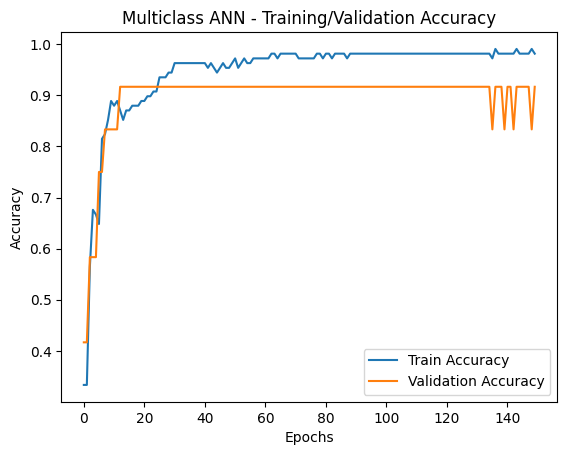

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Multiclass ANN - Training/Validation Accuracy")
plt.legend()
plt.show()

#### 7. Evaluate the Model

In [10]:
# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [11]:
# Results
print("Confusion Matrix:\n", confusion_matrix(y_true_classes, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



| **Concept**                 | **Implementation**                                  |
| --------------------------- | --------------------------------------------------- |
| **Multiclass Output Layer** | `Dense(3, activation='softmax')` (3 output neurons) |
| **Loss Function**           | `'categorical_crossentropy'`                        |
| **Label Encoding**          | `to_categorical()` to one-hot encode classes        |
| **Evaluation**              | Accuracy, Confusion Matrix, Classification Report   |
